### Load data set with features

In [1]:
from create_df import read_df
df, dfc, all_homes, appliance_min, national_average = read_df()

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


In [59]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
run all_functions.py

In [4]:
run features.py

In [5]:
import json

In [6]:
len(feature_map['15 min AMI']), len(feature_map['All']), len(feature_map['Monthly+Static']), len(feature_map['Monthly'])

(40, 43, 18, 15)

In [31]:
feature_map.keys()

['Monthly', 'All', '15 min AMI', 'Static', 'Monthly+Static']

#### First round of CV, finding optimal features maximising median accuracy

In [32]:
out_median, optimal_dict_median = find_optimal_features(df, dfc, all_homes, appliance_min, national_average, 
                                                        ["hvac","light","fridge","dr","wm","dw"],
                                                        {"Static":feature_map["Static"],
                                                        'Monthly':feature_map['Monthly']},
                          NUM_NEIGHBOURS_MAX=7, F_length_max=7, metric="median",
                          train_outlier=True, test_outlier=False, outlier_features=None, outlier_fraction=0.1,
                     print_steps=True)

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
hvac
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
********************
Monthly
********************
include: aggregate_5 -> feature_subset: ['aggregate_5']. Accuracy: 81.5093101239
include: aggregate_7 -> feature_subset: ['aggregate_5', 'aggregate_7']. Accuracy: 83.3832876158
include: aggregate_9 -> feature_subset: ['aggregate_5', 'aggregate_7', 'aggregate_9']. Accuracy: 84.3130341951
include: aggregate_12 -> feature_subset: ['aggregate_5', 'aggregate_7', 'aggregate_9', 'aggregate_12']. Accuracy: 84.3594715233
include: aggregate_2 -> feature_subset: ['aggregate_5', 'aggregate_7', 'aggregate_9', 'aggregate_12', 'aggregate_2']. Accuracy: 84.9079572132
include: aggregate_8 -> feature_subset: ['aggregate_5', 'aggregate_7', 'aggregate_9', 'aggregate_12', 'aggregate_2', 'aggregate_8']. Accuracy: 84.8096670697
include: aggregate_11 -> feature_subset: ['aggregate_5', 'aggregate_7', 'aggregate_9', 'aggregate_12', 'aggregate_2', 'aggregate_8', 'aggregate_11']

In [7]:
import json
#json.dump(optimal_dict_median, open("optimal_dict_cv1_sensitivity.json","w"))
#json.dump(out_median, open("out_cv1_sensitivity.json","w"))

optimal_dict_median_overall = json.load(open("optimal_dict_cv1.json",'r'))
optimal_dict_median = json.load(open("optimal_dict_cv1_sensitivity.json",'r'))

### Second round of cross validation- Maximising mean accuracy after removing test outlier

In [8]:
out_cv2 = {}
optimal_cv2 = {}
for appliance in ["fridge","hvac","dw","dr","wm","light"]:
    out_cv2[appliance] = {}
    optimal_cv2[appliance] = {}
    for feature in ["Static","Monthly"]:
        
        o, opt = find_optimal_features(df, dfc, all_homes, appliance_min, national_average, 
                                                                [appliance], 
                                       {feature:feature_map[feature]},
                                  NUM_NEIGHBOURS_MAX=7, F_length_max=7, metric="mean",
                                  train_outlier=True, test_outlier=True, outlier_features=
                                       optimal_dict_median_overall[appliance]["All"]["f"], outlier_fraction=0.1,
                             print_steps=True)
        out_cv2[appliance][feature]=o
        optimal_cv2[appliance][feature]=opt

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
fridge
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
********************
Static
********************
include: total_occupants -> feature_subset: ['total_occupants']. Accuracy: 68.6695087534
include: area -> feature_subset: ['total_occupants', 'area']. Accuracy: 68.0135672065
include: num_rooms -> feature_subset: ['total_occupants', 'area', 'num_rooms']. Accuracy: 71.5496330685
include: total_occupants -> feature_subset: ['total_occupants']. Accuracy: 70.508783332
include: area -> feature_subset: ['total_occupants', 'area']. Accuracy: 70.2950873394
include: num_rooms -> feature_subset: ['total_occupants', 'area', 'num_rooms']. Accuracy: 70.4375293654
include: total_occupants -> feature_subset: ['total_occupants']. Accuracy: 72.21187814
include: num_rooms -> feature_subset: ['total_occupants', 'num_rooms']. Accuracy: 69.7242596329
include: area -> feature_subset: ['total_occupants', 'num_rooms', 'area']. Accuracy: 70.3750126961
include: total_occupant

In [10]:
json.dump(optimal_cv2, open("optimal_cv2_sensitivity.json",'w'))
json.dump(out_cv2, open("out_cv2_sensitivity.json",'w'))

In [11]:
out_cv2 = json.load(open("out_cv2_sensitivity.json",'r'))

In [27]:
out_cv2['light']['Monthly']['light']['Monthly']

{u'1': {u'accuracy': 37.13806432541721,
  u'f': [u'aggregate_9', u'difference_min_max']},
 u'2': {u'accuracy': 46.53609739279665,
  u'f': [u'difference_min_max',
   u'aggregate_9',
   u'ratio_min_max',
   u'aggregate_8',
   u'aggregate_10']},
 u'3': {u'accuracy': 43.250544944968965, u'f': [u'difference_min_max']},
 u'4': {u'accuracy': 44.38393544023571,
  u'f': [u'aggregate_1', u'aggregate_10']},
 u'5': {u'accuracy': 43.08541676916261,
  u'f': [u'aggregate_11', u'aggregate_12', u'aggregate_10']},
 u'6': {u'accuracy': 42.724180208651696, u'f': [u'aggregate_1']}}

In [50]:
top_f = {
    'dr':{
        'Monthly':{
        'f':[u'aggregate_12', u'aggregate_10'],
        'k':5
        },
        'Static':{
            'f':[u'num_rooms', u'total_occupants', u'area'],
            'k':5
            
        }
        },
    'dw':
    {
        'Static':
        {
            'k':6,
            'f':[u'area', u'total_occupants']
        },
        'Monthly':
        {
            'k':5,
            'f':[u'aggregate_10']
            
        }
    },
    'fridge':
    {
        'Monthly':
        {
            'k':2,
            'f':[u'aggregate_12',
               u'aggregate_5',
               u'ratio_min_max',
               u'ratio_difference_min_max',
               u'aggregate_4',
               u'aggregate_1']
        },
        'Static':
        {
            'k':1,
            'f':[u'total_occupants', u'area', u'num_rooms']
            
        }
    },
    
    'hvac':
    {
        'Static':
        {
            'k':6,
            'f':[u'area']
        },
        'Monthly':
        {
            'k':2,
            'f':[u'aggregate_7',
               u'aggregate_2',
               u'aggregate_10',
               u'aggregate_5',
               u'aggregate_9',
               u'aggregate_12',
               u'aggregate_6']
        }
        
    },
    'wm':
       { 
        'Monthly':
        {
            'k':1,
            'f':[u'aggregate_11', u'aggregate_10', u'aggregate_2']
        },
        'Static':
        {
            'k':6,
            'f':[u'area']
        }
    },
    'light':
    {
        'Static':
        {
            'k':6,
            'f':[u'area']
        },
        'Monthly':
        {
            'k':2,
            'f':[u'difference_min_max',
               u'aggregate_9',
               u'ratio_min_max',
               u'aggregate_8',
               u'aggregate_10']
        }
    }
    
    
    
}

In [34]:
optimal_all_median = json.load(open("optimal_dict_cv1.json",'r'))
optimal_median_sensitivity = json.load(open("optimal_dict_cv1_sensitivity.json",'r'))
optimal_mean_sensitivity = top_f
optimal_all_mean = json.load(open("optimal_cv2.json",'r'))

In [51]:
s = {}
for appliance in ['fridge','dw','dr','hvac','light','wm']:
    print appliance
    s[appliance] = {}
    for feature in ["All",'Monthly','Static']:
        s[appliance][feature] = {}
        if feature=="All":
            k=optimal_all_mean[appliance]['All'][appliance]['All']['k']
            f=optimal_all_mean[appliance]['All'][appliance]['All']['f']
            train_outlier_f = optimal_all_median[appliance]['All']['f']
        else:
            k=top_f[appliance][feature]['k']
            f=top_f[appliance][feature]['f']
            train_outlier_f = optimal_median_sensitivity[appliance][feature]['f']
            
        temp = create_predictions(df, dfc, all_homes, appliance_min,
                                          national_average, appliance=appliance, 
                                          feature=f,
                                          NUM_NEIGHBOURS=k, train_outlier=True, test_outlier=True,
                                          outlier_features=train_outlier_f, outlier_fraction=0.1)


        errors = {}
        if appliance =="hvac":
            start_month, end_month = 5, 11
        else:
            start_month, end_month = 1, 13
        for i in range(start_month, end_month):
            errors[i] = percentage_error(temp[i]["gt"], temp[i]["pred"])
        error_df = pd.DataFrame(errors)
        accur_df = 100-error_df
        accur_df[accur_df<0]=0
        tdf = accur_df
        if appliance =="hvac":
            for home in [624, 1953, 6636, 6836, 7769, 9922]:
                tdf.loc[home, 5]=np.NaN
                tdf.loc[home, 10]=np.NaN

        s[appliance][feature] = tdf.dropna().mean().mean()

fridge
dw
dr
hvac
light
wm


/Users/nipunbatra/anaconda/lib/python2.7/site-packages/sklearn/covariance/robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det (-53.251586074133130 > -inf)
  % (det, previous_det), RuntimeWarning)


In [78]:
appliance_name_mapping = {"dr": "Dryer", "wm": "Washing\nmachine",
                          "fridge":"Fridge","light":"Lights",
                          "hvac":"HVAC","dw":"Dish\nwasher"}

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [105]:
sen = pd.DataFrame(s)

In [106]:
sen

dr 
 dw 
 fridge 
 hvac 
 light 
 wm 
 
 
 
 
 All 
 46.676615 
 45.756176 
 79.253608 
 83.218137 
 49.357385 
 66.443781 
 
 
 Monthly 
 44.762341 
 40.427641 
 76.617781 
 83.195882 
 46.536097 
 62.767684 
 
 
 Static 
 44.470307 
 37.390754 
 71.570956 
 79.983186 
 52.871403 
 58.156344

In [107]:
sen = sen.rename(columns=appliance_name_mapping).T

In [111]:
from common_functions import latexify, format_axes
latexify()

tableau20blind =  [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
  
# Rescale to values between 0 and 1
for i in range(len(tableau20blind)):  
    r, g, b = tableau20blind[i]  
    tableau20blind[i] = (r / 255., g / 255., b / 255.)

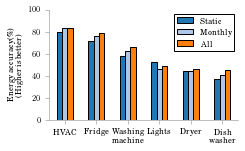

In [113]:
sen[['Static','Monthly','All']].ix[['HVAC','Fridge','Washing\nmachine',
                                    'Lights','Dryer','Dish\nwasher']].plot(kind="bar",rot=0, colors=tableau20blind)
plt.ylim((0, 100));
plt.ylabel("Energy accuracy(\%)\n(Higher is better)");
plt.tight_layout()
format_axes(plt.gca())
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/features_sensitivity.pdf",bbox_inches="tight")
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/features_sensitivity.png",bbox_inches="tight")